<a href="https://colab.research.google.com/github/Suriya6744/bsc_dpdm22/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

# Import Data

In [165]:
import pandas as pd
import json

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 7-11

In [167]:
with open('/content/drive/MyDrive/bsc_DMPM_data/MIDterm/7-eleven.json') as json_file:
    sv = json.loads(json_file.read())

In [168]:
sv.keys()

dict_keys(['1', '4', '6', '7', '9', '11', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '28', '29', '30', '31', '32', '33', '35', '36', '38', '40', '491', '493', '494', '495', '496', '497', '498', '499', '508', '509', '510', '511', '512', '513', '515', '517', '518', '519', '520', '521', '522', '523', '524', '525', '526', '527', '528', '529', '531', '532', '533', '534', '535', '536', '537', '538', '539', '540', '541', '542', '543', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '557', '558', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', '598', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625',

## school

In [169]:
with open('/content/drive/MyDrive/bsc_DMPM_data/MIDterm/school.json') as json_file:
    sc = json.loads(json_file.read())

In [170]:
sc.keys()

dict_keys(['1', '4', '6', '7', '9', '11', '16', '17', '18', '19', '2', '21', '22', '23', '24', '25', '26', '28', '29', '3', '31', '32', '33', '35', '36', '38', '491', '493', '494', '495', '496', '497', '498', '499', '508', '509', '51', '511', '512', '513', '515', '517', '518', '519', '52', '521', '522', '523', '524', '525', '526', '527', '528', '529', '531', '532', '533', '534', '535', '536', '537', '538', '539', '54', '541', '542', '543', '545', '546', '547', '548', '549', '55', '551', '552', '553', '554', '555', '557', '558', '56', '561', '562', '563', '564', '565', '566', '567', '568', '569', '57', '571', '572', '573', '574', '575', '576', '577', '578', '579', '58', '581', '582', '583', '584', '585', '586', '587', '588', '589', '59', '591', '592', '593', '594', '595', '596', '597', '598', '601', '602', '603', '604', '605', '606', '607', '608', '609', '61', '611', '612', '613', '614', '615', '616', '617', '618', '619', '62', '621', '622', '623', '624', '625', '626', '627', '628', '62

## คำตอบนักประเมิน

In [171]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [172]:
gsht = gc.open_by_key('1A3A-Yl4Tmcq2kPWf37QG6xdRZZ-4XDWULRPfORGPrNQ')
worksheet = gsht.worksheet("บ้าน")
rows = worksheet.get_all_values()
ass = pd.DataFrame.from_records(rows)
ass.columns=ass.iloc[0] 
ass = ass.iloc[1:,]
ass.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,1,https://nayoo.co/khonkaen/posts/25,25,บ้านเดี่ยว,มั่นใจ,"2,890,000","2,500,000","5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,2,https://nayoo.co/khonkaen/posts/25,25,บ้านเดี่ยว,มั่นใจ,"2,890,000","2,700,000","โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,1,https://nayoo.co/khonkaen/posts/33,33,บ้านเดี่ยว,มั่นใจ,"2,600,000","2,200,000","5,000-15,000",,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/33,33,บ้านเดี่ยว,มั่นใจ,"2,600,000","2,400,000","ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,1,https://nayoo.co/khonkaen/posts/495,495,บ้านเดี่ยว,มั่นใจ,"6,050,000","5,000,000","5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


## Data House

In [173]:
gsht = gc.open_by_key('1QO6OiGqyr8i78MVnjyLBBtr5Y8AoBM1tHZRg0Ud5CW4')
worksheet = gsht.worksheet("บ้านมือ1")
rows = worksheet.get_all_values()
home1 = pd.DataFrame.from_records(rows)
home1.columns=home1.iloc[0] 
home1 = home1.iloc[1:,]
home1.head()

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,is_pro_in_house,created_at,updated_at,deleted_at
1,314,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,,,,0,0,,0,44012,44602,
2,315,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านแฝด,...,,,,0,0,,0,44012,44602,
3,316,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,,,,0,0,,0,44012,44602,
4,317,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,,,,0,0,,0,44012,44602,
5,318,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,,,,0,0,,0,44012,44602,


In [174]:
gsht = gc.open_by_key('1QO6OiGqyr8i78MVnjyLBBtr5Y8AoBM1tHZRg0Ud5CW4')
worksheet = gsht.worksheet("บ้านมือ2")
rows = worksheet.get_all_values()
home2 = pd.DataFrame.from_records(rows)
home2.columns=home2.iloc[0] 
home2.iloc[1:,].head()

,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
1,1,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านวังเวิน,,ขอนแก่น,ชนบท,ศรีบุญเรือง,บ้านเดี่ยว,no,...,ไม่มี,,,,,,,,,
2,4,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านหนองบัวบาน,,ขอนแก่น,น้ำพอง,ทรายมูล,บ้านเดี่ยว,no,...,ไม่มี,,,,,,,,,
3,16,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,,,ขอนแก่น,มัญจาคีรี,กุดเค้า,บ้านเดี่ยว,no,...,ไม่ระบุ,,,,,,,,,
4,18,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,ชลลดา ขอนแก่น,บริษัท แลนด์แอนด์เฮ้าส์ จำกัด (มหาชน),ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,,,,,,,,,
5,19,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,เบสท์โฮม,เบสท์โฮม เลี่ยงเมืองขอนแก่น,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,,,,,,,,,


# Clear

In [175]:
for i in home1.columns:
    print(i)

id
parent_id
project_name
province
district
sub_district
zip_code
zone_id
zone
property_type
company
company_id
order
user_id
street
name_th
name_en
description
latitude
longitude
number_of_rai
number_of_ngan
number_of_va
construct_year
model
sell_price
rent_price
expire_date
expired
close_reason
usable_area
number_of_unit
number_of_story
number_of_bedroom
number_of_bathroom
central_cost
direction
furniture
rent_status
accept_agent
number_of_parking
area
building_number
number_of_building
floor_number
parking_percentage
number_of_lift
line_group_id
line_group_name
line_group_image
minimum_contract_month
has_lift
can_pet
can_smoke
has_ac
has_wardrobe
has_single_bed
has_double_bed
has_makeup_desk
has_desk
has_sofa
has_sink
has_tv
has_refrig
has_heater
has_cable_tv
has_wifi
has_lan
has_other
water_as_use
water_as_use_unit_price
water_as_use_minimum
water_as_normal
water_per_person
water_per_person_price
water_per_person_maximum
water_per_person_over_price
water_per_room
water_per_room_pri

In [176]:
ass1 = ass[ass['ID ผู้ประเมิน']=='1']
ass1.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,1,https://nayoo.co/khonkaen/posts/25,25,บ้านเดี่ยว,มั่นใจ,"2,890,000","2,500,000","5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
3,1,https://nayoo.co/khonkaen/posts/33,33,บ้านเดี่ยว,มั่นใจ,"2,600,000","2,200,000","5,000-15,000",,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,1,https://nayoo.co/khonkaen/posts/495,495,บ้านเดี่ยว,มั่นใจ,"6,050,000","5,000,000","5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,1,https://nayoo.co/khonkaen/posts/564,564,บ้านเดี่ยว,มั่นใจ,"4,400,000","3,500,000","5,000-18,000",,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,1,https://nayoo.co/khonkaen/posts/566,566,บ้านเดี่ยว,มั่นใจ,"2,750,000","2,500,000","5,000-25,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

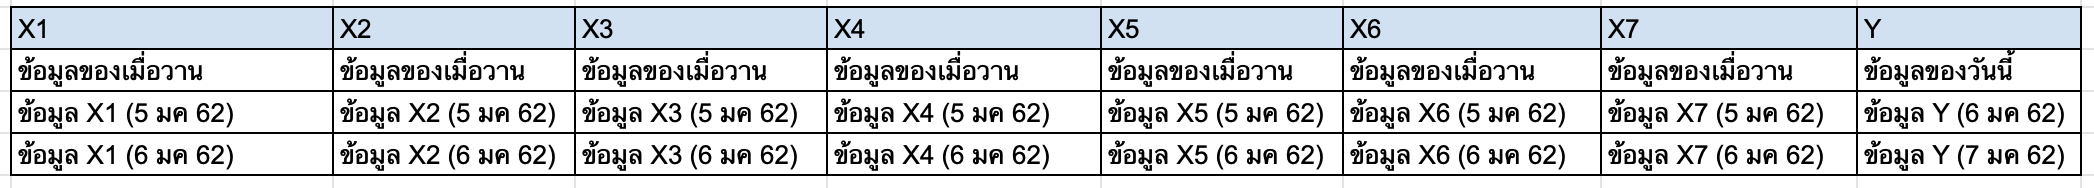



In [177]:
df = pd.read_csv('/content/drive/MyDrive/bsc_DMPM_data/GroupQuiz1/Group7_17ธนภรณ์_19นารากร_20สุริยา_35อรัญญา.csv')
df

,จังหวัด,วันที่,เดือน,ปี,สถานีความกด,สถานีความชื้นสัมพัทธ์,สถานีอุณหภูมิตุ้มแห้ง,สถานีอุณหภูมิจุดน้ำค้าง,สถานีอุณหภูมิต่ำสุด,สถานีจำนวนเมฆ,สถานีปริมาณฝน,สถานีความเร็วลม,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,ขอนแก่น,1,10,2011,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,ขอนแก่น,2,10,2011,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,ขอนแก่น,3,10,2011,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,1007.49,86,25.6,22.9,22.1,10,3,3
3,ขอนแก่น,4,10,2011,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,1008.28,80,25.8,21.9,22.8,8,0,2
4,ขอนแก่น,5,10,2011,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,1009.88,86,24.3,21.7,23.1,10,2.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,เลย,24,2,2021,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,353201-เลย จ.เลย,353201-เลย จ.เลย,353201-เลย จ.เลย,353301-เลย สกษ. จ.เลย,353201-เลย จ.เลย,353301-เลย สกษ. จ.เลย,1008.39,69,26.8,18.4,18.0,0,0,1
8165,เลย,25,2,2021,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,353201-เลย จ.เลย,353201-เลย จ.เลย,353201-เลย จ.เลย,353301-เลย สกษ. จ.เลย,353201-เลย จ.เลย,353301-เลย สกษ. จ.เลย,1006.05,61,27.8,17.3,19.5,0,0,1
8166,เลย,26,2,2021,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,353201-เลย จ.เลย,353201-เลย จ.เลย,353201-เลย จ.เลย,353301-เลย สกษ. จ.เลย,353201-เลย จ.เลย,353301-เลย สกษ. จ.เลย,1004.86,55,26.3,13.0,16.0,0,0,2
8167,เลย,27,2,2021,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,353201-เลย จ.เลย,353201-เลย จ.เลย,353201-เลย จ.เลย,353301-เลย สกษ. จ.เลย,353201-เลย จ.เลย,353301-เลย สกษ. จ.เลย,1005.76,56,25.2,13.8,15.3,2,0,1


In [178]:
df= df[['ความกด','ความชื้นสัมพัทธ์','อุณหภูมิตุ้มแห้ง','อุณหภูมิจุดน้ำค้าง','อุณหภูมิต่ำสุด','จำนวนเมฆ','ปริมาณฝน','ความเร็วลม']]
df

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,1007.49,86,25.6,22.9,22.1,10,3,3
3,1008.28,80,25.8,21.9,22.8,8,0,2
4,1009.88,86,24.3,21.7,23.1,10,2.2,2
...,...,...,...,...,...,...,...,...
8164,1008.39,69,26.8,18.4,18.0,0,0,1
8165,1006.05,61,27.8,17.3,19.5,0,0,1
8166,1004.86,55,26.3,13.0,16.0,0,0,2
8167,1005.76,56,25.2,13.8,15.3,2,0,1


In [179]:
df[df.eq('-').any(1)]

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
305,1009.88,78,27.9,23.5,24.3,4,-,4
306,1009.47,73,27.5,21.9,23.7,2,-,2
307,1008.08,69,27.3,20.7,22.5,3,-,3
308,1008.35,72,27.1,21.3,22.8,5,-,5
309,1009.30,72,27.0,21.3,23.5,2,-,2
...,...,...,...,...,...,...,...,...
8134,1011.66,72,23.9,15.6,15.0,-,0,1
8135,1011.62,73,23.2,15.7,15.0,-,0,2
8140,1015.28,74,22.6,15.2,-,1,-,2
8161,1013.57,68,23.2,15.2,14.0,-,0,1


In [180]:
df = df[df.eq('-').any(1)==False]
df.shape

(5208, 8)

In [181]:
df = df[df.eq('T').any(1)==False]
df.shape

(5061, 8)

In [182]:
from sklearn import preprocessing

In [183]:
scaler = preprocessing.StandardScaler()
#train
scaler.fit(df)
#predict-transform
data_features_d_s = scaler.transform(df)

In [184]:
data_features_d_s

array([[-2.29910857,  1.33170074,  0.95480871, ...,  2.28184617,
        -0.02291572,  0.5914187 ],
       [-1.92549238,  2.28581221,  0.21958617, ...,  2.68279133,
         2.36850273, -0.23542385],
       [-1.65952832,  1.64973789,  0.21958617, ...,  2.68279133,
         0.21182474,  0.5914187 ],
       ...,
       [-2.49224914, -1.63664607,  0.47691406, ..., -1.32666027,
        -0.22831362, -0.23542385],
       [-2.20728764, -1.53063368,  0.07254167, ..., -0.52476995,
        -0.22831362, -1.06226641],
       [-1.43155912, -1.31860891,  0.21958617, ..., -0.92571511,
        -0.22831362, -1.06226641]])

In [185]:
eiei = pd.DataFrame(data_features_d_s)
eiei

,0,1,2,3,4,5,6,7
0,-2.299109,1.331701,0.954809,1.591977,1.476662,2.281846,-0.022916,0.591419
1,-1.925492,2.285812,0.219586,1.536882,0.930473,2.682791,2.368503,-0.235424
2,-1.659528,1.649738,0.219586,1.233861,0.657378,2.682791,0.211825,0.591419
3,-1.409395,1.013664,0.293108,0.958388,0.869785,1.880901,-0.228314,-0.235424
4,-0.902797,1.649738,-0.258308,0.903293,0.960816,2.682791,0.094455,-0.235424
...,...,...,...,...,...,...,...,...
5056,-1.374567,-0.152473,0.660720,-0.005770,-0.586720,-1.326660,-0.228314,-1.062266
5057,-2.115467,-1.000572,1.028331,-0.308790,-0.131562,-1.326660,-0.228314,-1.062266
5058,-2.492249,-1.636646,0.476914,-1.493326,-1.193596,-1.326660,-0.228314,-0.235424
5059,-2.207288,-1.530634,0.072542,-1.272948,-1.406003,-0.524770,-0.228314,-1.062266


In [186]:
df

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,1007.49,86,25.6,22.9,22.1,10,3,3
3,1008.28,80,25.8,21.9,22.8,8,0,2
4,1009.88,86,24.3,21.7,23.1,10,2.2,2
...,...,...,...,...,...,...,...,...
8164,1008.39,69,26.8,18.4,18.0,0,0,1
8165,1006.05,61,27.8,17.3,19.5,0,0,1
8166,1004.86,55,26.3,13.0,16.0,0,0,2
8167,1005.76,56,25.2,13.8,15.3,2,0,1
